# Bike store sales using CSV file

### Import numpy, pandas and matplotlib

#### Note: "%matplotlib inline" is used for plotting inline in Jupiter notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Import the cvs files where is all the bike store sales

In [2]:
sales = pd.read_csv(
    'data/sales_data.csv',
    parse_dates=['Date'])

### Print the first 5 values of the bike stores sales db

In [3]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


### The mean of `Customers_Age`

In [4]:
sales['Customer_Age'].mean()

35.91921157861212

The <b>density (KDE)</b> and the <b>box plot</b> plotting with the `Customer_Age` data:

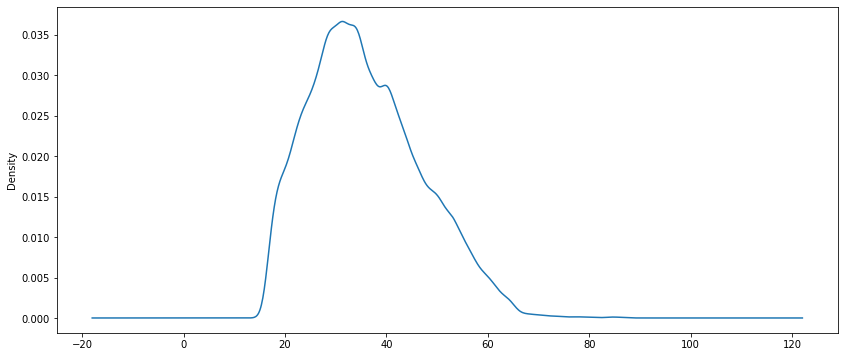

In [5]:
sales['Customer_Age'].plot(kind='kde', figsize=(14,6))

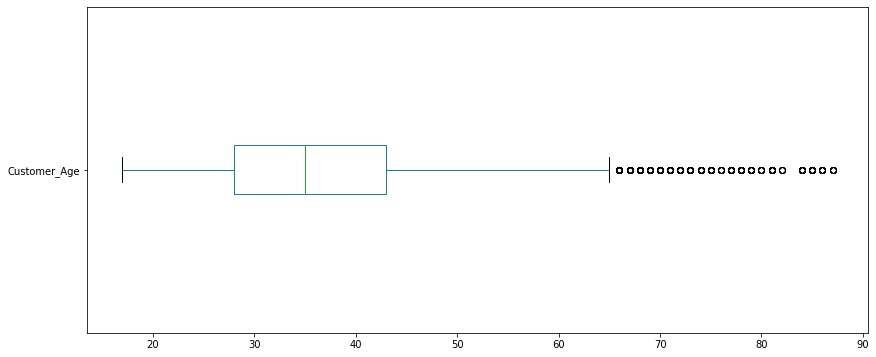

In [6]:
sales['Customer_Age'].plot(kind='box', vert=False, figsize=(14,6))

### The mean of `Order_Quantity`

In [7]:
sales['Order_Quantity'].mean()

11.901659648253654

The <b>histogram</b> and <b>box plot</b> plotting with the `Order_Quantity` data:

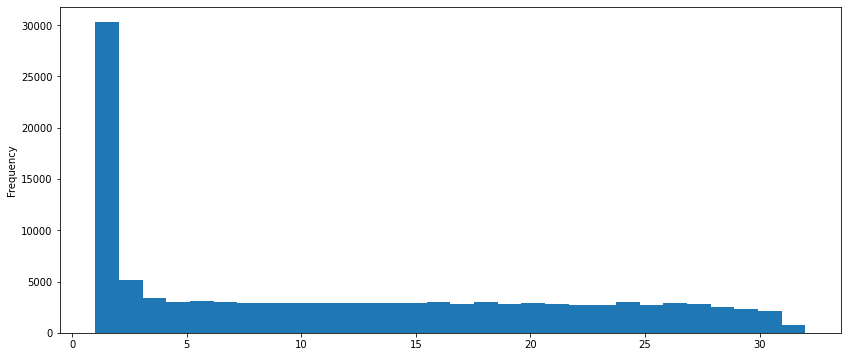

In [8]:
sales['Order_Quantity'].plot(kind='hist', bins=30, figsize=(14,6))

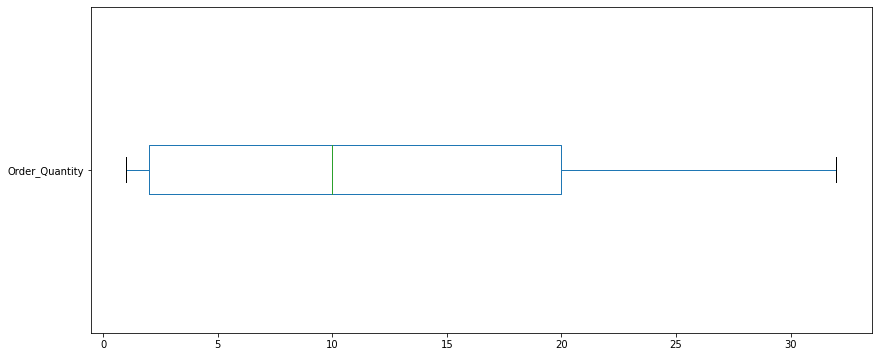

In [9]:
sales['Order_Quantity'].plot(kind='box', vert=False, figsize=(14,6))


### The sales per year

In [10]:
sales['Year'].value_counts()

2016    29398
2014    29398
2015    24443
2013    24443
2012     2677
2011     2677
Name: Year, dtype: int64

The <b>pie plot</b> with the previous data:

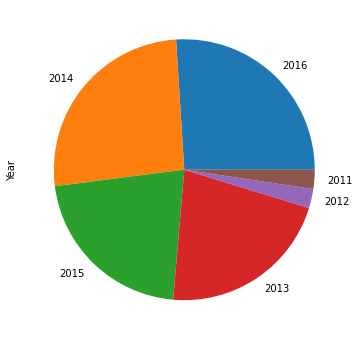

In [11]:
sales['Year'].value_counts().plot(kind='pie', figsize=(6,6))

### How many sales per month do we have?

In [ ]:
sales['Month'].value_counts()

Go ahead and show a <b>bar plot</b> with the previous data:

In [ ]:
sales['Month'].value_counts().plot(kind='bar', figsize=(14,6))

### Which country has the most sales `quantity of sales`?

In [ ]:
sales['Country'].value_counts().head(1)

In [ ]:
sales['Country'].value_counts()

Go ahead and show a <b>bar plot</b> of the sales per country:

In [ ]:
sales['Country'].value_counts().plot(kind='bar', figsize=(14,6))

### Create a list of every product sold

In [ ]:
#sales.loc[:, 'Product'].unique()

sales['Product'].unique()

Create a **bar plot** showing the 10 most sold products (best sellers):

In [ ]:
sales['Product'].value_counts().head(10).plot(kind='bar', figsize=(14,6))

### Can you see any relationship between `Unit_Cost` and `Unit_Price`?

Show a <b>scatter plot</b> between both columns.

In [ ]:
sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(6,6))

### Can you see any relationship between `Order_Quantity` and `Profit`?

Show a <b>scatter plot</b> between both columns.

In [ ]:
sales.plot(kind='scatter', x='Order_Quantity', y='Profit', figsize=(6,6))

### Can you see any relationship between `Profit` per `Country`?

Show a grouped <b>box plot</b> per country with the profit values.

In [ ]:
sales[['Profit', 'Country']].boxplot(by='Country', figsize=(10,6))

### Can you see any relationship between the `Customer_Age` per `Country`?

Show a grouped <b>box plot</b> per country with the customer age values.

In [ ]:
sales[['Customer_Age', 'Country']].boxplot(by='Country', figsize=(10,6))

### Add and calculate a new `Calculated_Date` column

Use `Day`, `Month`, `Year` to create a `Date` column (`YYYY-MM-DD`).

In [ ]:
sales['Calculated_Date'] = sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)

sales['Calculated_Date'].head()

### Parse your `Calculated_Date` column into a datetime object

In [ ]:
sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])

sales['Calculated_Date'].head()

### How did sales evolve through the years?

Show a <b>line plot</b> using `Calculated_Date` column as the x-axis and the count of sales as the y-axis.

In [ ]:
sales['Calculated_Date'].value_counts().plot(kind='line', figsize=(14,6))

### Increase 50 U$S revenue to every sale

In [ ]:
#sales['Revenue'] = sales['Revenue'] + 50

sales['Revenue'] += 50

### How many orders were made in `Canada` or `France`?

In [ ]:
sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]

### How many `Bike Racks` orders were made from Canada?

In [ ]:
sales.loc[(sales['Country'] == 'Canada') & (sales['Sub_Category'] == 'Bike Racks')].shape[0]

### How many orders were made in each region (state) of France?

In [ ]:
france_states = sales.loc[sales['Country'] == 'France', 'State'].value_counts()

france_states

Go ahead and show a <b>bar plot</b> with the results:

In [ ]:
france_states.plot(kind='bar', figsize=(14,6))

### How many sales were made per category?

In [13]:
sales['Product_Category'].value_counts()

Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

Go ahead and show a <b>pie plot</b> with the results:

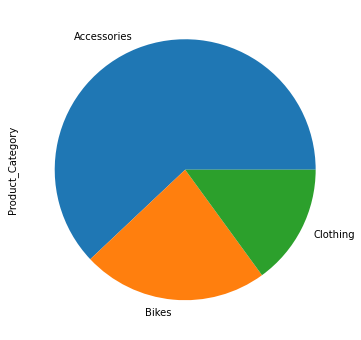

In [15]:
sales['Product_Category'].value_counts().plot(kind='pie', figsize=(6,6))

### How many orders were made per accessory sub-categories?

In [ ]:
accessories = sales.loc[sales['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()

accessories

Go ahead and show a <b>bar plot</b> with the results:

In [ ]:
accessories.plot(kind='bar', figsize=(14,6))

### How many orders were made per bike sub-categories?

In [ ]:
bikes = sales.loc[sales['Product_Category'] == 'Bikes', 'Sub_Category'].value_counts()

bikes

Go ahead and show a <b>pie plot</b> with the results:

In [ ]:
bikes.plot(kind='pie', figsize=(6,6))

### Which gender has the most amount of sales?

In [ ]:
sales['Customer_Gender'].value_counts()

In [ ]:
sales['Customer_Gender'].value_counts().plot(kind='bar')

### How many sales with more than 500 in `Revenue` were made by men?

In [ ]:
sales.loc[(sales['Customer_Gender'] == 'M') & (sales['Revenue'] == 500)].shape[0]

### Get the top-5 sales with the highest revenue

In [ ]:
sales.sort_values(['Revenue'], ascending=False).head(5)

### Get the sale with the highest revenue

In [ ]:
#sales.sort_values(['Revenue'], ascending=False).head(1)

cond = sales['Revenue'] == sales['Revenue'].max()

sales.loc[cond]

### What is the mean `Order_Quantity` of orders with more than 10K in revenue?

In [ ]:
cond = sales['Revenue'] > 10_000

sales.loc[cond, 'Order_Quantity'].mean()

### What is the mean `Order_Quantity` of orders with less than 10K in revenue?

In [ ]:
cond = sales['Revenue'] < 10_000

sales.loc[cond, 'Order_Quantity'].mean()

### How many orders were made in May of 2016?

In [ ]:
cond = (sales['Year'] == 2016) & (sales['Month'] == 'May')

sales.loc[cond].shape[0]

### How many orders were made between May and July of 2016?

In [ ]:
cond = (sales['Year'] == 2016) & (sales['Month'].isin(['May', 'June', 'July']))

sales.loc[cond].shape[0]

Show a grouped <b>box plot</b> per month with the profit values.

In [ ]:
profit_2016 = sales.loc[sales['Year'] == 2016, ['Profit', 'Month']]

profit_2016.boxplot(by='Month', figsize=(14,6))

### Add 7.2% TAX on every sale `Unit_Price` within United States

In [ ]:
#sales.loc[sales['Country'] == 'United States', 'Unit_Price'] = sales.loc[sales['Country'] == 'United States', 'Unit_Price'] * 1.072

sales.loc[sales['Country'] == 'United States', 'Unit_Price'] *= 1.072